<h1 align="center">Loan Repayment Prediction Using Machine Learning</h1>
<hr>

### Objective:

* Predicts whether the bank should approves the loan of an applicant based on his profit using Ensemble Learning Methods.

**Submission by:-**

Aditya (2110993754) <br>
Baashi (2110993771) <br>
Deepanshi (2110993873)
<hr>

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

Reading File

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.shape

(9578, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [8]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
df = df.drop(['days.with.cr.line', 'revol.bal', 'revol.util', 'delinq.2yrs', 'pub.rec'], axis = 1)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,0,0


In [10]:
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

It has **7 unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(6).

In [11]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [12]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,inq.last.6mths,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,1,0
3,1,2,0.1008,162.34,11.350407,8.10,712,1,0
4,1,1,0.1426,102.92,11.299732,14.97,667,0,0


In [13]:
df['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

## Data Visualization

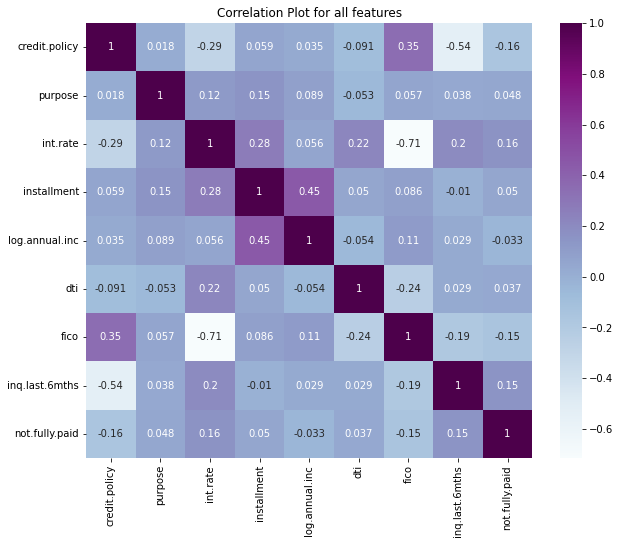

In [14]:
plt.figure(figsize = (10, 8)) 
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.title("Correlation Plot for all features")
plt.show()

We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.fully.paid)



<AxesSubplot:>

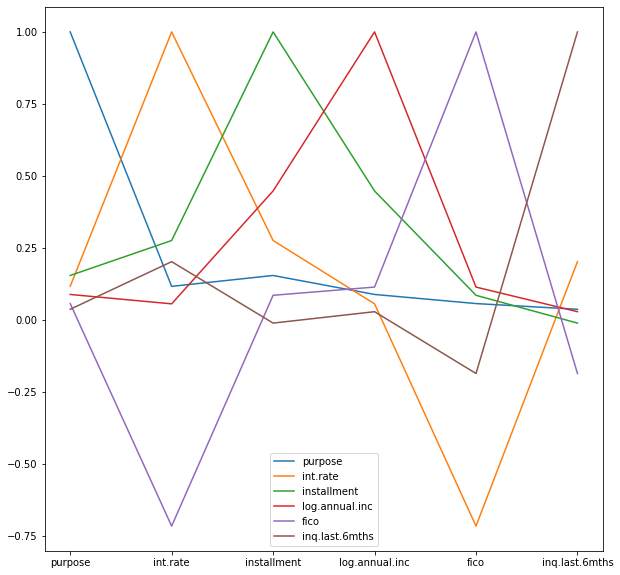

In [15]:
df1 = df.drop(['credit.policy','not.fully.paid', 'dti'], axis = 1)
df1.corr().plot(figsize=(10,10))

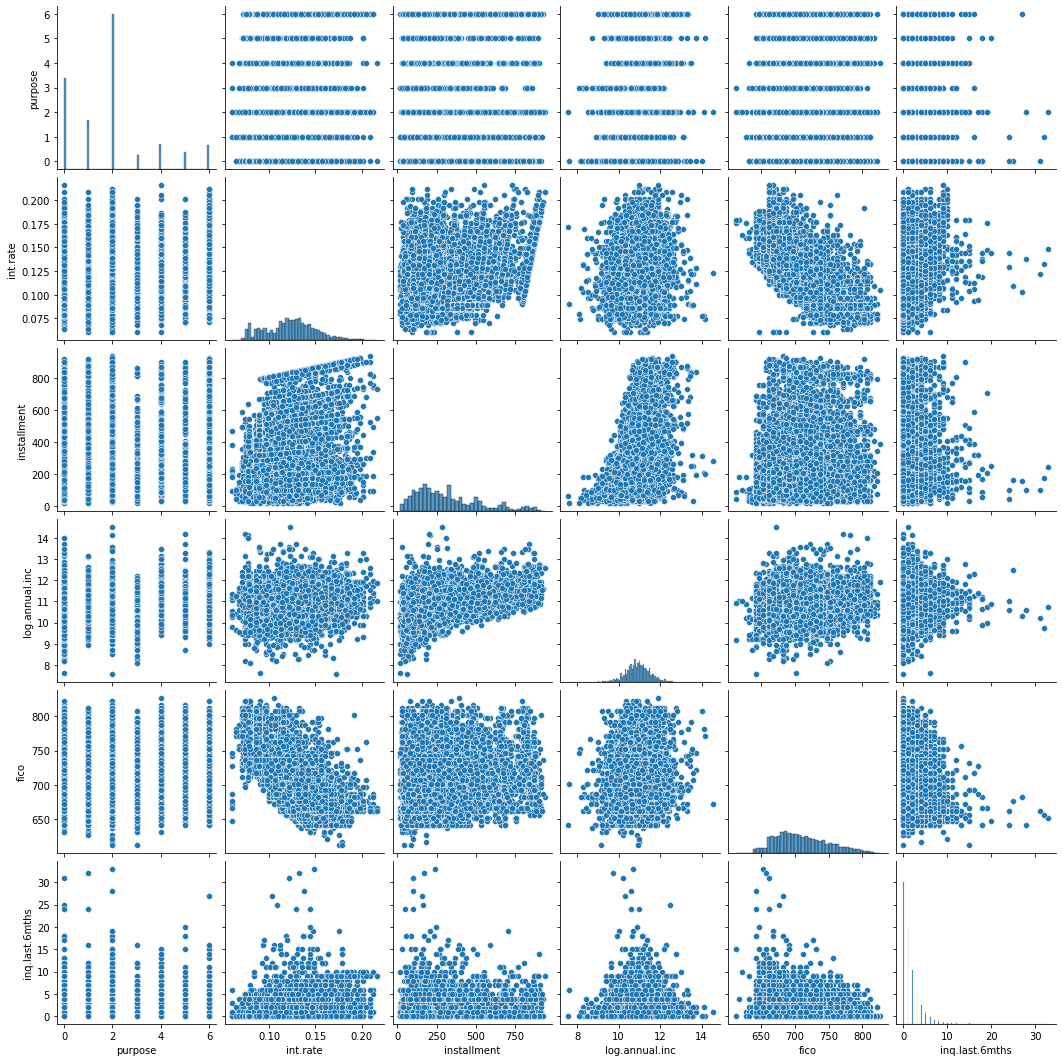

In [24]:
sns.pairplot(df1)

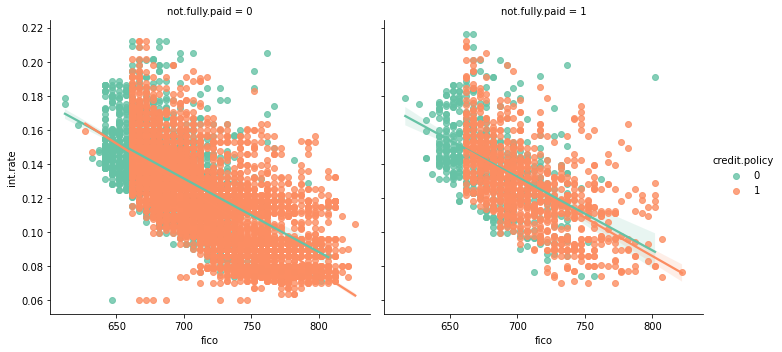

In [25]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

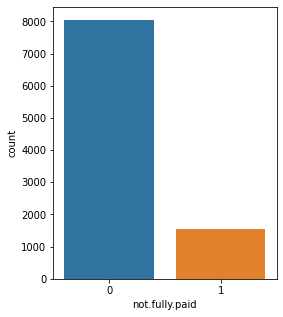

In [26]:
plt.figure(1, figsize=(4,5))
sns.countplot(df['not.fully.paid'])

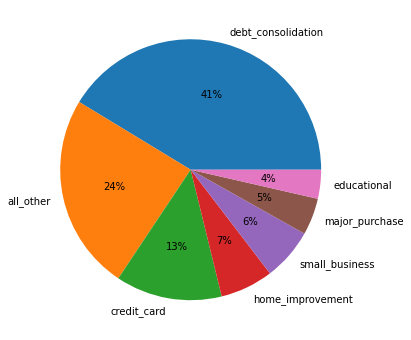

In [27]:
plt.figure(figsize = (8,6))
data = [3957, 2331, 1262, 629, 619, 437, 343]
keys = ['debt_consolidation', 'all_other', 'credit_card', 'home_improvement', 'small_business', 'major_purchase', 'educational']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

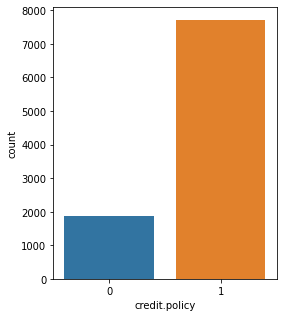

In [28]:
plt.figure(figsize = (4,5))
sns.countplot(x=df["credit.policy"])

Text(0.5, 0, 'FICO')

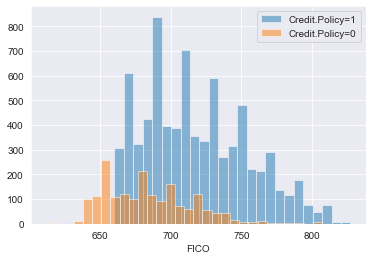

In [29]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, alpha=0.5, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, alpha=0.5, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'INT RATE')

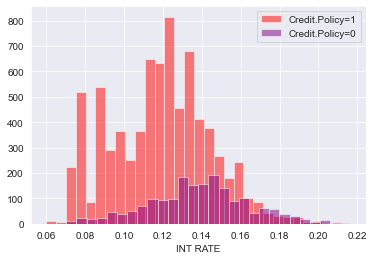

In [30]:
plt.hist(df['int.rate'].loc[df['credit.policy']==1], bins=30, alpha=0.5, color = 'red', label='Credit.Policy=1')
plt.hist(df['int.rate'].loc[df['credit.policy']==0], bins=30, alpha=0.5, color = 'purple', label='Credit.Policy=0')
plt.legend()
plt.xlabel('INT RATE')

Text(0.5, 0, 'FICO')

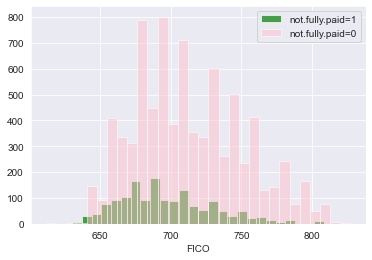

In [31]:
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.7, color = 'green', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color = 'pink', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

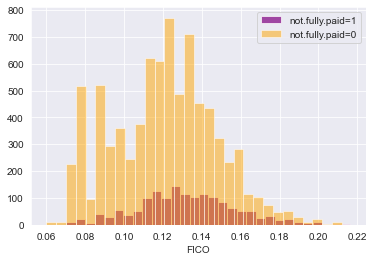

In [34]:
df[df['not.fully.paid']==1]['int.rate'].hist(bins=30, alpha=0.7, color = 'purple', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['int.rate'].hist(bins=30, alpha=0.5, color = 'orange', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

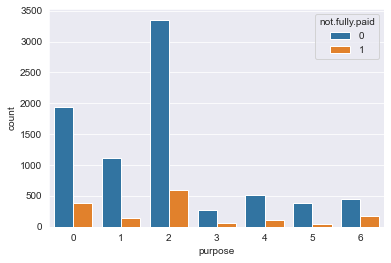

In [35]:
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

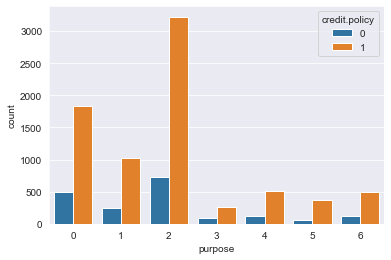

In [36]:
sns.countplot(data=df, x='purpose', hue='credit.policy')

### Train-Test Split

Splitting the dataset for training and testing purpose.

In [37]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Modeling

### Logistic Regression

In [39]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
y_pred_train = logr.predict(X_train)
y_pred_test = logr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [40]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2423    8]
 [ 435    8]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8458594293667363


We got the **Accuracy of 84.5%** with Logistic Regression

### K-nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [58]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2381   50]
 [ 432   11]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.18      0.02      0.04       443

    accuracy                           0.83      2874
   macro avg       0.51      0.50      0.48      2874
weighted avg       0.74      0.83      0.77      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8322894919972165


We got the **Accuracy of 83.2%** with K-nearest Neighbors

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
D_model=DecisionTreeClassifier(max_depth = 5)
D_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [61]:
y_predict_train = D_model.predict(X_train)
y_predict_test=D_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)

In [62]:
#print(accuracy_score(y_test,y_predict_default))
print("Confusion Matrix \n",confusion_matrix(y_test,y_predict_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_predict_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2410   21]
 [ 436    7]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.25      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.55      0.50      0.47      2874
weighted avg       0.75      0.84      0.78      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8435262529832935
Test Accuracy score: 0.8409881697981907


We got the **Accuracy of 84.0%** with Decision Tree

## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
R_model = RandomForestClassifier(n_estimators = 400)
R_model.fit(X_train, y_train)
y_pred_train = R_model.predict(X_train)
y_pred_test = R_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [84]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2415   16]
 [ 426   17]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.52      0.04      0.07       443

    accuracy                           0.85      2874
   macro avg       0.68      0.52      0.49      2874
weighted avg       0.80      0.85      0.79      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  1.0
Test Accuracy score: 0.8462073764787752


We got the **Accuracy of 84.6%** with Random Forest Classifier

### Support Vector Classifier

In [85]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear')  
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [86]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2429    2]
 [ 443    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.77      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8451635351426583


We got the **Accuracy of 84.5%** with SVM

While Computing different **Machine Learning Models**, We Found that the **Logistic Regression and SVM** algo are giving similar result with minimum difference in accuracy. Even though in all these Ensembles-

We Found that the **Best Model for this DataSet is Random Forest with Accuracy of 84.6%.**

<h3 align="center">Thank You</h3>